## PCA For Dimensionality Reduction
Note that these results are not included in the report.

## Load Data

In [2]:
import os
import time
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


# Load the CIFAR10 dataset
from keras.datasets import cifar10
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)


print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])


xTrain=xTrain[:10000,:]
yTrain=yTrain[:10000]
print(xTrain.shape)
print(yTrain.shape)

Using TensorFlow backend.


(49000, 32, 32, 3)
(49000,)
(49000, 3072)
[  59.   62.   63. ...,  123.   92.   72.]
(10000, 3072)
(10000,)


## Cumulative Explained Variance against Number of Components

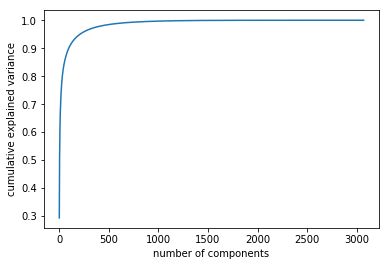

In [55]:
combined=np.vstack((xTrain,xVal))
from sklearn.decomposition import PCA
pca = PCA().fit(combined)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [56]:
print(pca.explained_variance_ratio_.cumsum()[149])
print(pca.explained_variance_ratio_.cumsum()[499])

0.930647321259
0.984641073552


Therefore, if we choose to reduce the number of components to 150, we can retain 93.1% of the variance in the data. On the other hand, if we reduce the number of components to 500, we can retain 98.5% of the variance in the data.

## Using 150 Dimensions 

In [71]:
# Reduce to 150 dimensions.
pca = PCA(n_components=150) # project from 3072 to 150 dimensions
pca.fit(combined)
projected = pca.transform(combined)
print(pca.explained_variance_.shape)
print(pca.components_.shape)
print(combined.shape)
print(projected.shape)

(150,)
(150, 3072)
(11000, 3072)
(11000, 150)


In [72]:
x_train=projected[:10000,:]
y_train=yTrain

x_test=projected[10000:,:]
y_test=yVal


In [73]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 150)
(10000,)
(1000, 150)
(1000,)


In [74]:
from sklearn import svm   #After running various iterations, the polynomial kernel was chosen as the best kernel in this case.
svc = svm.SVC(probability=False,  kernel="poly", C=1)
svc.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
pred = svc.predict(x_train)
acc_train = np.mean(pred == y_train)
print('Train Accuracy = {0:f}'.format(acc_train))
print(pred)

Train Accuracy = 1.000000
[6 9 9 ..., 1 1 5]


In [76]:
pred = svc.predict(x_test)
acc_test = np.mean(pred == y_test)
print('Test Accuracy = {0:f}'.format(acc_test))
print(pred)

Test Accuracy = 0.402000
[8 5 4 2 2 7 0 8 4 3 6 2 9 2 2 3 5 5 0 2 4 1 5 3 8 8 1 3 0 6 4 1 6 0 5 9 2
 4 4 3 3 6 8 9 7 8 6 8 3 2 8 7 5 9 4 4 6 9 7 2 0 6 6 9 9 9 1 8 7 3 4 7 4 6
 3 6 5 4 5 0 6 4 6 2 1 8 0 0 2 2 8 0 4 4 1 6 1 4 6 4 0 5 7 5 2 7 5 0 3 2 6
 7 9 3 3 8 3 6 3 6 5 4 1 9 0 9 4 2 0 3 0 5 9 8 8 2 3 9 2 7 6 2 2 4 0 5 6 1
 9 2 1 6 0 2 4 8 2 1 9 2 8 8 7 1 0 5 9 8 0 0 7 5 4 8 8 6 9 0 2 2 0 3 9 7 8
 0 1 3 5 2 5 8 6 0 8 8 8 1 7 4 6 0 6 7 2 2 9 2 9 6 2 9 1 4 3 6 5 9 6 0 8 1
 3 2 2 1 4 5 2 5 1 4 1 7 1 8 0 2 9 1 2 6 4 4 1 0 0 8 2 9 8 7 4 8 2 0 2 8 0
 5 9 3 7 3 7 2 9 3 8 1 4 3 7 1 2 4 0 2 8 7 4 2 6 0 1 2 3 9 3 6 2 8 3 5 5 9
 8 2 2 3 5 3 3 0 5 4 8 4 8 2 2 4 4 2 6 7 4 4 4 6 6 4 9 7 5 3 4 3 2 6 8 6 2
 5 4 5 8 1 8 2 8 2 5 4 8 2 8 2 4 8 6 2 4 6 0 3 4 6 8 0 6 0 6 7 6 1 6 6 7 9
 8 8 8 0 8 0 0 5 3 8 3 1 6 8 6 0 3 4 8 8 7 4 4 0 6 5 4 7 1 7 0 1 3 6 1 9 3
 2 2 1 8 1 4 7 3 8 8 2 2 0 0 4 3 0 6 4 1 0 5 8 2 6 4 3 8 1 1 5 7 0 6 2 8 8
 6 8 8 6 9 5 4 7 3 5 7 6 6 6 4 4 7 6 4 3 3 8 0 8 3 1 3 2 7 6 8 4 6 8 2 8 5


## Plotting Misclassified Images

In [77]:
def plt_img(x):
    nrow = 32
    ncol = 32
    ncolors=3
    xsq = x.reshape((nrow,ncol,ncolors))
    plt.imshow(xsq)
#     plt.xticks([])
#     plt.yticks([])

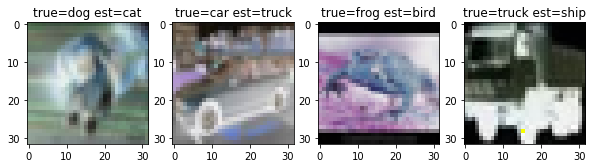

In [102]:
Ierr = np.where((pred != y_test))[0]
np.random.shuffle(Ierr)
nplt = 4
plt.figure(figsize=(10, 4))
for i in range(nplt):        
    plt.subplot(1,nplt,i+1)        
    ind = Ierr[i]    
    plt_img(xVal[ind,:])        
    title = 'true={0:s} est={1:s}'.format(classesName[y_test[ind].astype(int)], classesName[pred[ind].astype(int)])
    plt.title(title)

## Using 500 Dimensions 

In [30]:
# Reduce to 500 dimensions.

pca = PCA(n_components=500) # project from 3072 to 500 dimensions
pca.fit(combined)
projected = pca.transform(combined)
print(pca.explained_variance_.shape)
print(pca.components_.shape)
print(combined.shape)
print(projected.shape)

(500,)
(500, 3072)
(11000, 3072)
(11000, 500)


In [31]:
x_train=projected[:10000,:]
y_train=yTrain

x_test=projected[10000:,:]
y_test=yVal



In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 500)
(10000,)
(1000, 500)
(1000,)


In [35]:
from sklearn import svm
svc = svm.SVC(probability=False,  kernel="poly", C=1)
svc.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
pred = svc.predict(x_train)
acc_train = np.mean(pred == y_train)
print('Train Accuracy = {0:f}'.format(acc_train))
print(pred)

Test Accuracy = 1.000000
[6 9 9 ..., 1 1 5]


In [36]:
pred = svc.predict(x_test)
acc_test = np.mean(pred == y_test)
print('Test Accuracy = {0:f}'.format(acc_test))
print(pred)

Test Accuracy = 0.396000
[8 5 4 2 2 7 0 8 4 3 6 4 9 2 2 3 5 5 8 2 4 1 5 3 8 8 1 2 0 1 4 1 6 4 5 9 2
 4 6 3 0 6 8 1 7 8 2 8 3 2 1 7 5 4 0 4 3 9 7 4 0 6 6 0 9 9 1 8 7 3 4 7 4 6
 3 4 5 4 5 0 6 4 6 2 1 8 0 0 2 2 8 0 4 4 1 6 1 4 6 4 8 5 7 3 2 7 6 0 8 2 6
 7 9 3 3 8 3 2 3 6 3 4 1 9 0 9 4 2 0 3 0 5 9 8 8 2 3 9 2 7 5 2 2 4 2 5 6 1
 9 2 1 6 0 2 4 8 2 1 0 2 8 8 7 1 0 5 0 8 0 0 7 4 4 8 0 6 9 8 4 2 0 3 9 7 8
 2 1 2 6 2 5 8 6 0 8 8 8 1 7 4 6 8 8 7 2 2 9 2 9 6 2 9 1 4 2 2 5 9 6 0 8 2
 3 2 2 1 4 5 2 5 1 4 1 7 1 8 0 4 9 1 2 6 4 4 1 0 0 8 2 9 2 7 4 8 2 0 2 8 0
 5 9 2 7 3 7 6 9 3 8 1 4 3 6 1 2 4 0 5 8 9 4 2 6 2 1 2 3 9 3 6 2 8 3 7 6 9
 8 2 2 3 5 3 2 0 5 4 8 4 8 2 2 6 4 2 4 7 4 4 4 6 6 4 9 7 5 2 4 3 2 6 8 6 7
 5 4 5 8 1 8 2 8 2 5 4 8 2 8 2 4 8 2 2 4 6 0 3 4 6 8 0 6 0 6 7 6 1 6 6 7 9
 8 8 8 0 8 0 8 5 0 8 3 1 6 8 6 9 3 2 8 8 7 4 4 8 6 5 4 7 1 7 0 1 3 6 1 9 3
 2 4 1 8 1 4 4 3 8 8 2 2 3 0 4 2 0 6 4 1 0 7 8 2 6 4 6 8 1 1 5 7 0 6 2 8 8
 6 8 8 6 9 5 4 7 3 5 2 4 6 6 4 6 7 6 4 3 6 8 0 8 3 1 3 2 7 6 8 4 6 8 2 0 5


## Discussion

Therefore, we see that the test accuracy decreases from 40.2% to 39.6% if we increase the number of components from 150 to 500. Hence, in addition to decreasing the time to train the dataset, PCA also serves to filter noise in this case. 

In comparison to the case without using dimensionality reduction, PCA significantly improves the accuracy on the test set from 30.6% (3072 dimensions) to 40.2% (150 dimensions). However, notice that the optimal kernel in this case is the polynomial kernel in contrast to the linear kernel used earlier without dimensionality reduction. This is because the 150 components are in a different coordinate system that is better modelled by the polynomial kernel.